In [1]:
import numpy as np
import pandas as pd
import os
import re
from tqdm import tqdm
import ast
import scipy.cluster.hierarchy as shc
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from IPython.display import Markdown
from collections import Counter
from fonctions import *

# lemmes

In [2]:
os.chdir('/home/noe/Documents/2022-2023/ENC/Mémoire/dictionnaires_lemmes/')

In [3]:
df = pd.read_excel('pdv_lemma.xlsx')
df.pop('Unnamed: 0')

df2 = pd.read_excel('guerin_lemma.xlsx')
df2.pop('Unnamed: 0')

pdv_lemma = df.set_index('index')[0].to_dict()
guerin_lemma = df2.set_index('index')[0].to_dict()

In [4]:
'''match_bi = {}

for i in tqdm(list(pdv_lemma.keys())):
    big = create_bigrams(pdv_lemma.get(i))
    correspondance = []
    lesgrams = []

    for key in list(guerin_lemma.keys()):
        liste_bigrams = create_bigrams(guerin_lemma.get(key))
        for bigram in big:
            if bigram in liste_bigrams:
                correspondance.append(key)
                lesgrams.append(bigram)
                break
                
    match_bi[i] = correspondance
delete_empty_values(match_bi)
'''

'match_bi = {}\n\nfor i in tqdm(list(pdv_lemma.keys())):\n    big = create_bigrams(pdv_lemma.get(i))\n    correspondance = []\n    lesgrams = []\n\n    for key in list(guerin_lemma.keys()):\n        liste_bigrams = create_bigrams(guerin_lemma.get(key))\n        for bigram in big:\n            if bigram in liste_bigrams:\n                correspondance.append(key)\n                lesgrams.append(bigram)\n                break\n                \n    match_bi[i] = correspondance\ndelete_empty_values(match_bi)\n'

In [5]:
'''pdv = []

for idx in list(match_bi.keys()):
    pdv.append(pdv_lemma.get(idx))
    
guerin = []

for liste in list(match_bi.values()):
    sentence = []
    for value in liste:
        sentence.append(guerin_lemma.get(value))
    guerin.append(sentence)'''

'pdv = []\n\nfor idx in list(match_bi.keys()):\n    pdv.append(pdv_lemma.get(idx))\n    \nguerin = []\n\nfor liste in list(match_bi.values()):\n    sentence = []\n    for value in liste:\n        sentence.append(guerin_lemma.get(value))\n    guerin.append(sentence)'

In [6]:
'''sentences = dict(zip(pdv,guerin))'''

'sentences = dict(zip(pdv,guerin))'

In [7]:
'''list(sentences.items())[0][0]'''

'list(sentences.items())[0][0]'

# mots

## fonctions

## code

In [8]:
file = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/PDV_grams.xlsx'
guerin = '/home/noe/Documents/2022-2023/ENC/Mémoire/Dataframes/Guerin_grams.xlsx'

In [9]:
os.chdir('/home/noe/Documents/2022-2023/ENC/Mémoire/Comparaison_de_mots/')

In [10]:
df_pdv = pd.read_excel(file)
df_guerin = pd.read_excel(guerin)

In [11]:
df = pd.DataFrame({'texts':df_pdv['textes'],'clean_PDV': df_pdv['textes'].apply(clean_text)})

pdv = {}
for i in range(len(df)):
    for sentence in df['clean_PDV'][i]:
        pdv[f'pdv_{i+1}_{df["clean_PDV"][i].index(sentence)+1}'] = sentence

In [12]:
df2 = pd.DataFrame({'guerin_texts':df_guerin['text'],'clean_guerin':df_guerin['text'].apply(clean_text)})

column_without_brackets = [[string.replace('[', '').replace(']', '').lstrip().rstrip() for string in sublist] for sublist in df2['clean_guerin']]

df2['clean'] = column_without_brackets
guerin = {}
for i in range(len(df2)):
    for sentence in df2['clean'][i]:        
        guerin[f'guerin_{i+1}_{df2["clean"][i].index(sentence)+1}'] = sentence

In [13]:
'''match_bi_words = {}

for i in tqdm(list(pdv.keys())):
    big = create_bigrams(pdv.get(i))
    correspondance = []
    lesgrams = []

    for key in list(guerin.keys()):
        liste_bigrams = create_bigrams(guerin.get(key))
        for bigram in big:
            if bigram in liste_bigrams:
                correspondance.append(key)
                lesgrams.append(bigram)
                break
                
    match_bi_words[i] = correspondance
delete_empty_values(match_bi_words)'''

'match_bi_words = {}\n\nfor i in tqdm(list(pdv.keys())):\n    big = create_bigrams(pdv.get(i))\n    correspondance = []\n    lesgrams = []\n\n    for key in list(guerin.keys()):\n        liste_bigrams = create_bigrams(guerin.get(key))\n        for bigram in big:\n            if bigram in liste_bigrams:\n                correspondance.append(key)\n                lesgrams.append(bigram)\n                break\n                \n    match_bi_words[i] = correspondance\ndelete_empty_values(match_bi_words)'

In [14]:
'''pdv_words = []

for idx in list(match_bi_words.keys()):
    pdv_words.append(pdv.get(idx))
    
guerin_words = []

for liste in list(match_bi_words.values()):
    sentence = []
    for value in liste:
        sentence.append(guerin.get(value))
    guerin_words.append(sentence)'''

'pdv_words = []\n\nfor idx in list(match_bi_words.keys()):\n    pdv_words.append(pdv.get(idx))\n    \nguerin_words = []\n\nfor liste in list(match_bi_words.values()):\n    sentence = []\n    for value in liste:\n        sentence.append(guerin.get(value))\n    guerin_words.append(sentence)'

In [15]:
'''dico_sentences_words = dict(zip(pdv_words,guerin_words))'''

'dico_sentences_words = dict(zip(pdv_words,guerin_words))'

In [16]:
'''sentence1 = pdv_words[10]
sentence2 = guerin_words[10][2]'''

'sentence1 = pdv_words[10]\nsentence2 = guerin_words[10][2]'

## modified dictionnary test

In [17]:
list_stop_words = ['et','de','per','pro','ad','ac','in','at']

In [18]:
pdv_liste_values = list(pdv.values())
pdv_liste_keys = list(pdv.keys())

guerin_liste_values = list(guerin.values())
guerin_liste_keys = list(guerin.keys())

In [19]:
pdv_stopwords = dict(zip(pdv_liste_keys,remove_words_from_sentence_list(pdv_liste_values)))
guerin_stopwords = dict(zip(guerin_liste_keys,remove_words_from_sentence_list(guerin_liste_values)))

In [20]:
match_bi_word_without_stopwords = {}

for i in tqdm(list(pdv_stopwords.keys())):
    big = create_bigrams(pdv_stopwords.get(i))
    correspondance = []
    lesgrams = []

    for key in list(guerin_stopwords.keys()):
        liste_bigrams = create_bigrams(guerin_stopwords.get(key))
        for bigram in big:
            if bigram in liste_bigrams:
                correspondance.append(key)
                lesgrams.append(bigram)
                break
                
    match_bi_word_without_stopwords[i] = correspondance
delete_empty_values(match_bi_word_without_stopwords)

100%|███████████████████████████████████████| 2074/2074 [03:06<00:00, 11.13it/s]


In [21]:
pdv_words_stopwords = []

for idx in list(match_bi_word_without_stopwords.keys()):
    pdv_words_stopwords.append(pdv_stopwords.get(idx))
    
guerin_words_stopwords = []

for liste in list(match_bi_word_without_stopwords.values()):
    sentence = []
    for value in liste:
        sentence.append(guerin_stopwords.get(value))
    guerin_words_stopwords.append(sentence)

In [22]:
useless_words = ['ut','sic','non']

In [23]:
sentences_stopwords = dict(zip(pdv_words_stopwords,guerin_words_stopwords))

## Pie charts des bigrams les plus fréquents

In [24]:
bigrams = []

for i in range(len(sentences_stopwords)):
    
    step = []
    
    phrase_1 = list(sentences_stopwords.items())[i][0]

    for sentence in list(sentences_stopwords.items())[i][1]:
        
        step.append(get_common_grams(phrase_1,sentence))
        
    bigrams.append(step)

In [25]:
def flatten_list_of_lists(lst):
    result = []
    for item in lst:
        if isinstance(item, list):
            result.extend(flatten_list_of_lists(item))
        else:
            result.append(item)
    return result

In [26]:
liste_grams = flatten_list_of_lists(bigrams)

In [27]:
counter = Counter(liste_grams).most_common(10)

In [28]:
keys = [' '.join(value[0]) for value in counter]    
counts = [value[1]/len(liste_grams) for value in counter]
reste = 1 - sum(counts)
counts.append(reste)
counts = sorted(counts, reverse=True)
keys.insert(0,'autre')

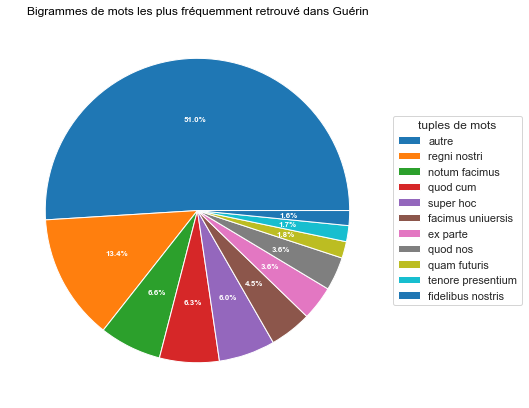

In [29]:
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(aspect="equal"))
sns.set(style="whitegrid")

data = counts
ingredients = keys



def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%"

wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, ingredients,
          title="tuples de mots",
          loc="center left",
         bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=8, weight="bold")

ax.set_title('Bigrammes de mots les plus fréquemment retrouvé dans Guérin')

plt.show()


## dico bigrams

In [30]:
dico_bigram = {key:value for key,value in zip(list(sentences_stopwords.keys()),bigrams)}
list(dico_bigram.items())[0]

('quid facimus inquiunt quia hic homo hostibus sic triumphat si sic ipsum dimittimus omnem sibi subiciet gloriam lombardorum more cesareo ueniens non tardabit ut posse nobis locum auferat destruat gentem nostram',
 [[('nobis', 'locum')], [('sic', 'ipsum')]])

## Other common words : dico of at least three words in common

In [31]:
def get_list_bool(item):
    
    liste_of_booleans = []

    phrase1 = item[0]

    for element in range(len(item[1])):

        dico = {}

        phrase2 = item[1][element]

        phrase_1 = get_full_text(phrase1,pdv_stopwords)
        if phrase_1 == None:
            phrase_1 = phrase1
        phrase_2 = get_full_text(phrase2,guerin2_stopwords)
        if phrase_2 == None:
            phrase_2 = phrase2
        
        

        words1 = phrase_1.split()
        words2 = phrase_2.split()

        liste_commune = get_common_grams(phrase1,phrase2)

        index_word1_1 = 0
        index_word2_1 = 0
        index_word1_2 = 0
        index_word2_2 = 0

        for index in range(len(words1) - 1):
            if (words1[index], words1[index + 1]) == liste_commune[0]:
                index_word1_1 = index
                index_word2_1 = index + 1
                break

        for index in range(len(words2) - 1):
            if (words2[index], words2[index + 1]) == liste_commune[0]:
                index_word1_2 = index
                index_word2_2 = index + 1
                break

        words_1_list = []
        words_2_list = []

        for elm in range(len(words1)):
            if elm < index_word1_1:
                words_1_list.append([words1[elm]])
            elif elm == index_word1_1:
                words_1_list.append([words1[index_word1_1],words1[index_word2_1]])
            elif elm > index_word2_1:
                words_1_list.append([words1[elm]])

        for elm in range(len(words2)):
            if elm < index_word1_2:
                words_2_list.append([words2[elm]])
            elif elm == index_word1_2:
                words_2_list.append([words2[index_word1_2],words2[index_word2_2]])
            elif elm > index_word2_2:
                words_2_list.append([words2[elm]])



        #dictionnary part

        index_of_lists_with_more_than_one_element_x = 0

        for idx, sublist in enumerate(words_1_list):
            if len(sublist) > 1:
                index_of_lists_with_more_than_one_element_x = idx

        index_of_lists_with_more_than_one_element_y = 0

        for idx, sublist in enumerate(words_2_list):        
            if len(sublist) > 1:
                index_of_lists_with_more_than_one_element_y = idx


        for i in range(len(words_2_list)):
            if words_2_list[i] != words_2_list[index_of_lists_with_more_than_one_element_y]:
                words_2_list[i] = ' '.join(words_2_list[i])

        for i in range(len(words_1_list)):
            if words_1_list[i] != words_1_list[index_of_lists_with_more_than_one_element_x]:
                words_1_list[i] = ' '.join(words_1_list[i])

        liste_1 = words_1_list[:index_of_lists_with_more_than_one_element_x]
        liste_2 = words_1_list[index_of_lists_with_more_than_one_element_x]
        liste_3 = words_1_list[index_of_lists_with_more_than_one_element_x+1:]
        listes_x = [liste_1,liste_2,liste_3]

        flattened_x = [val for sublist in listes_x for val in sublist]

        liste_1_y = words_2_list[:index_of_lists_with_more_than_one_element_y]
        liste_2_y = words_2_list[index_of_lists_with_more_than_one_element_y]
        liste_3_y = words_2_list[index_of_lists_with_more_than_one_element_y+1:]
        listes_y = [liste_1_y,liste_2_y,liste_3_y]

        true_false_1 = [word in listes_y[0] for word in listes_x[0]]
        true_false_1 = [False if word in useless_words else value for word, value in zip(liste_1, true_false_1)]
        true_false_2 = [word in listes_y[1] for word in listes_x[1]]
        true_false_3 = [word in listes_y[2] for word in listes_x[2]]
        true_false_3 = [False if word in useless_words else value for word, value in zip(liste_3, true_false_3)]

        true_false = [true_false_1,true_false_2,true_false_3]
        true_false = [val for sublist in true_false for val in sublist]

        count_boolean = true_false.count(True)

        if count_boolean >= 8:
            liste_of_booleans.append(True)
        else:
            true_false = False
            liste_of_booleans.append(False)
            
    stratos = {item[0]:liste_of_booleans}
        
    return stratos

## Correct guerin dict

In [32]:
def count_keys_startswith(dct, prefix):
    count = 0
    for key in dct:
        if key.startswith(prefix):
            count += 1
    return count

In [33]:
liste_last =[]

for i in range(1,364):
    nbr_cles = list(range(1,count_keys_startswith(guerin,f'guerin_{i}_')+1))
    liste_last.append(nbr_cles)
flattened_list = [num for sublist in liste_last for num in sublist]
string_list = list(map(str, flattened_list))

In [34]:
print(liste_last)

[[1, 2, 3, 4, 5], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3], [1, 2], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4], [1, 2, 3], [1, 2, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], [1, 2, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17], [1, 2, 3, 4, 5], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4], [1

In [35]:
liste_cles_guerin = list(guerin.keys())

In [36]:
new_list = []
for idx in range(len(guerin)):
    new_str = liste_cles_guerin[idx].split('_')[0]+'_'+liste_cles_guerin[idx].split('_')[1] + '_' + string_list[idx]
    
    new_list.append(new_str)
        
guerin_2 = dict(zip(new_list,list(guerin.values())))

In [37]:
guerin2_liste_values = list(guerin_2.values())
guerin2_liste_keys = list(guerin_2.keys())
guerin2_stopwords = dict(zip(guerin2_liste_keys,remove_words_from_sentence_list(guerin2_liste_values)))

In [38]:
match_bi_word_without_stopwords2 = {}

for i in tqdm(list(pdv_stopwords.keys())):
    big = create_bigrams(pdv_stopwords.get(i))
    correspondance = []
    lesgrams = []

    for key in list(guerin2_stopwords.keys()):
        liste_bigrams = create_bigrams(guerin2_stopwords.get(key))
        for bigram in big:
            if bigram in liste_bigrams:
                correspondance.append(key)
                lesgrams.append(bigram)
                break
                
    match_bi_word_without_stopwords2[i] = correspondance
delete_empty_values(match_bi_word_without_stopwords2)

100%|███████████████████████████████████████| 2074/2074 [03:08<00:00, 11.02it/s]


In [39]:
pdv_words_stopwords = []

for idx in list(match_bi_word_without_stopwords2.keys()):
    pdv_words_stopwords.append(pdv_stopwords.get(idx))
    
guerin2_words_stopwords = []

for liste in list(match_bi_word_without_stopwords2.values()):
    sentence = []
    for value in liste:
        sentence.append(guerin2_stopwords.get(value))
    guerin2_words_stopwords.append(sentence)

In [40]:
sentences_stopwords2 = dict(zip(pdv_words_stopwords,guerin2_words_stopwords))

## Usage de la fonction pour obtenir un dictionnaire avec au moins 3 mots communs par phrase

In [41]:
startos = {}
liste_items = {}

for i in tqdm(range(len(sentences_stopwords2))):
    
    try:
    
        startos.update(get_list_bool(list(sentences_stopwords2.items())[i]))
    except Exception as e:
        print(f"An unexpected error occurred: {i}", e)
#je laisse volontairement ces cas sur le côté

 44%|█████████████████                      | 662/1510 [00:05<00:07, 120.09it/s]

An unexpected error occurred: 'NoneType' object has no attribute 'split'


 52%|████████████████████▍                  | 792/1510 [00:06<00:03, 183.76it/s]

An unexpected error occurred: can only concatenate str (not "NoneType") to str


 71%|██████████████████████████▊           | 1065/1510 [00:08<00:02, 155.59it/s]

An unexpected error occurred: can only concatenate str (not "NoneType") to str


 74%|████████████████████████████▎         | 1124/1510 [00:09<00:03, 114.13it/s]

An unexpected error occurred: unsupported operand type(s) for +: 'NoneType' and 'str'


 77%|█████████████████████████████▉         | 1158/1510 [00:09<00:04, 70.95it/s]

An unexpected error occurred: can only concatenate str (not "NoneType") to str
An unexpected error occurred: unsupported operand type(s) for +: 'NoneType' and 'str'


 81%|███████████████████████████████▍       | 1217/1510 [00:10<00:03, 88.75it/s]

An unexpected error occurred: unsupported operand type(s) for +: 'NoneType' and 'str'


 82%|███████████████████████████████▉       | 1236/1510 [00:10<00:03, 85.02it/s]

An unexpected error occurred: can only concatenate str (not "NoneType") to str
An unexpected error occurred: unsupported operand type(s) for +: 'NoneType' and 'str'


 90%|███████████████████████████████████▏   | 1364/1510 [00:12<00:02, 51.52it/s]

An unexpected error occurred: unsupported operand type(s) for +: 'NoneType' and 'str'


 97%|█████████████████████████████████████▉ | 1468/1510 [00:15<00:01, 33.99it/s]

An unexpected error occurred: 'NoneType' object has no attribute 'split'


100%|███████████████████████████████████████| 1510/1510 [00:16<00:00, 89.39it/s]


In [42]:
def contains_only_false(lst):
    return all(not val for val in lst)

In [43]:
startos = {key: value for key, value in startos.items() if not contains_only_false(value)}

In [44]:
liste_keys = []

for elm in list(startos.keys()):
    liste_keys.append(get_key(elm,pdv_stopwords))
    
liste_values = []

for i in liste_keys:
    liste_values.append(match_bi_word_without_stopwords2.get(i))
    
my_dict = dict(zip(liste_keys, liste_values))

In [45]:
guerin_true_tot = []

for elm in range(len(list(startos.items()))):
    
    item = list(startos.items())[elm]
    item2 = list(my_dict.items())[elm]
    
    guerin_true = []
    
    for i in range(len(item[1])):
        if item[1][i] == True:
            guerin_true.append(item2[1][i])
    guerin_true_tot.append(guerin_true)

In [46]:
startos2 = dict(zip(liste_keys,guerin_true_tot))

In [47]:
pdv_sentences = []

for idx in list(startos2.keys()):
    pdv_sentences.append(pdv_stopwords.get(idx))
    
guerin_2_sentences = []

for liste in list(startos2.values()):
    sentence = []
    for value in liste:
        sentence.append(guerin_2.get(value))
    guerin_2_sentences.append(sentence)

In [48]:
startos3 = dict(zip(pdv_sentences,guerin_2_sentences))

In [49]:
len(startos2)

632

In [50]:
item = list(startos3.items())[12]

In [51]:
x,y = get_lists(item)

NameError: name 'get_lists' is not defined

In [ ]:
inter = {}
for i in range(len(x[0])):
    if x[0][i] in y[0]:
        inter[f'**{x[0][i]}**'] = i
for i in range(len(list(inter.values()))):
    x[0][(list(inter.values())[i])] =  f'**{x[0][(list(inter.values())[i])]}**'

inter2 = {}
for i in range(len(x[2])):
    if x[2][i] in y[2]:
        inter2[f'**{x[2][i]}**'] = i
        
for i in range(len(list(inter2.values()))):
    x[2][(list(inter2.values())[i])] =  f'**{x[2][(list(inter2.values())[i])]}**'
    
x[1] = [f'**{word}**' for word in x[1]]
print(x[1])

sentence_x = ' '.join(x[0] + x[1] +x[2])

In [ ]:
sentence_x